In [2]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size=5 color=red>03_군집화_비지도학습</font>

# 1. 데이터 생성

- 남자, 여자의 키와 몸무게를 데이터를 군집화

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
random.randint(40, 95) # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

56

In [5]:
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160,195)])
# data

In [6]:
# 여자 (짝수)
for female in data[:100:2]:
    print(female, end = ' ')
    
print('\n------------------------')
# 남자 (홀수)
for male in data[1:100:2]:
    print(male, end = ' ')

[57, 164] [55, 166] [60, 156] [57, 161] [55, 168] [67, 162] [47, 150] [62, 143] [60, 150] [45, 166] [49, 144] [70, 157] [61, 161] [43, 157] [70, 164] [53, 149] [67, 154] [67, 159] [52, 159] [60, 170] [40, 149] [61, 154] [69, 150] [67, 148] [41, 142] [68, 160] [65, 146] [44, 148] [49, 143] [57, 153] [70, 143] [49, 164] [56, 164] [56, 152] [59, 166] [42, 143] [62, 164] [63, 165] [60, 170] [53, 163] [62, 166] [64, 164] [47, 148] [43, 141] [60, 149] [60, 168] [66, 151] [42, 140] [66, 148] [40, 161] 
------------------------
[75, 186] [71, 188] [72, 168] [68, 190] [86, 187] [63, 177] [92, 171] [65, 189] [93, 163] [84, 191] [83, 171] [73, 177] [77, 171] [88, 187] [92, 183] [84, 171] [89, 189] [69, 170] [83, 162] [76, 162] [74, 186] [66, 171] [73, 160] [90, 164] [74, 188] [65, 163] [74, 172] [87, 170] [70, 193] [78, 162] [77, 195] [77, 192] [82, 165] [64, 193] [80, 164] [78, 180] [75, 190] [71, 195] [72, 193] [80, 160] [80, 195] [64, 180] [63, 165] [88, 176] [61, 171] [61, 179] [77, 172] [63,

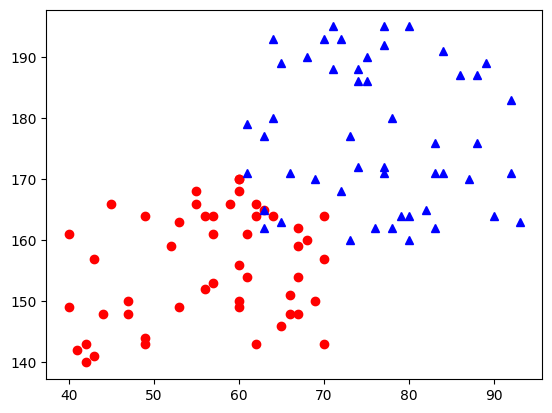

In [7]:
# print("여자 몸무게 :", [d[0] for d in data[::2]])
# print("여자 키 :", [d[1] for d in data[::2]])
# print("남자 몸무게 :", [d[0] for d in data[1::2]])
# print("남자 키 :", [d[1] for d in data[1::2]])

# for d in data[::2]:
#     plt.plot(d[0], d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]], [d[1] for d in data[::2]], 'o',color='r')
plt.plot([d[0] for d in data[1::2]], [d[1] for d in data[1::2]], '^',color='b')

# 2. 군집화 로직

In [8]:
# 초기 랜덤 지전 2개
random_points = [[random.randint(40,95), random.randint(140, 195)],
                 [random.randint(40,95), random.randint(140, 195)]]
random_points

[[44, 151], [95, 174]]

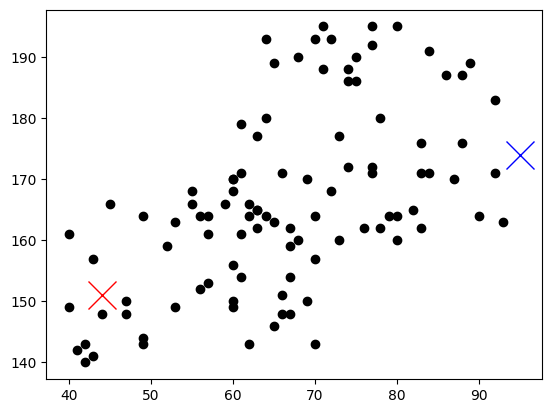

In [9]:
plt.plot([d[0] for d in data], 
         [d[1] for d in data], 'o',color='k')

plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color='r', markersize=20) # 기준점1

plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color='b', markersize=20) # 기준점2

In [10]:
# 두 점의 거리를 return (0, 0) ~ (4, 3) : 피타고라스
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [11]:
a = [0, 0]; b = [4, 3]
dist(a, b)

5.0

In [12]:
# 두 영역(random_porints[0]과 random_points[1]을 기준으로 나눈 두 영역)
group1 = [] # random_porints[0] 에 가까운 그룹
group2 = [] # random_porints[1] 에 가까운 그룹

for d in data :
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간X에 더 가까운 그룹
    else :
        group2.append(d) # 파랑X에 더 가까운 그룹

len(group1) , len(group2)

(54, 46)

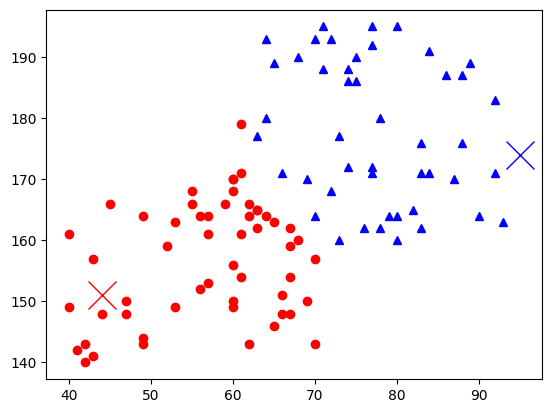

In [13]:
# 새로운 그룹 group1과 group2, 초기 랜덤지점
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2], 
         [d[1] for d in group2], '^', color='b')

plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점1

plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점2


In [14]:
# 기준점 이동 group1의 중심점, group2의 중심점
sumX = 0 ; sumY = 0

for g in group1:
    sumX += g[0]
    sumY += g[1]

# 새로운 기준점
random_points[0] = [sumX/len(group1), sumY/len(group1)]


sumX = 0 ; sumY = 0

for g in group2:
    sumX += g[0]
    sumY += g[1]

# 새로운 기준점
random_points[1] = [sumX/len(group2), sumY/len(group2)]

random_points

[[57.05555555555556, 156.64814814814815],
 [77.52173913043478, 177.67391304347825]]

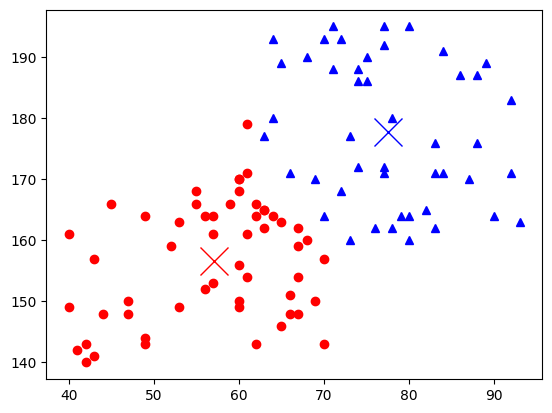

In [15]:
# 새로운 그룹 group1과 group2, 초기 랜덤지점
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2], 
         [d[1] for d in group2], '^', color='b')

plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점1

plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점2

# 3. 전체 코드 (for문 이용)

- 데이터 생성
- 랜덤포인트 2지점

- for문
    - 랜덤포인트 2지점기준으로 group1, group2 나눈다.
    - 랜덤포인트 이동 (group1중간점, group2중간점)

초기 포인트 : [[85, 167], [78, 145]]
1 번째 포인트 : [[76.0701754385965, 177.859649122807], [52.46511627906977, 153.88372093023256]]
2 번째 포인트 : [[78.33333333333333, 179.13725490196077], [53.0, 155.48979591836735]]
3 번째 포인트 : [[79.04166666666667, 180.04166666666666], [53.80769230769231, 156.01923076923077]]
4 번째 포인트 : [[79.31914893617021, 180.29787234042553], [54.0377358490566, 156.24528301886792]]
5 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]
6 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]
7 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]
8 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]
9 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]
10 번째 포인트 : [[79.6304347826087, 180.52173913043478], [54.24074074074074, 156.5]]


(140.0, 193.0)

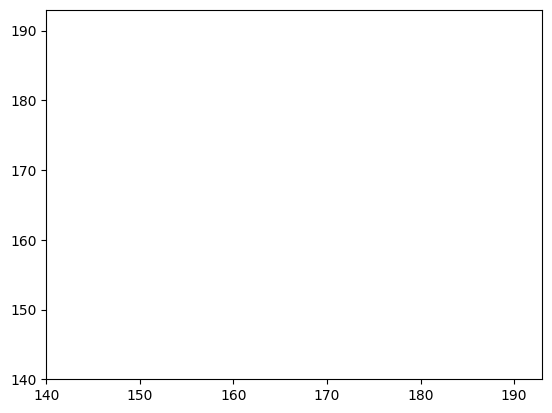

In [16]:
# 데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160,195)])

# 랜덤포인트 2지점
points = [[random.randint(40,95), random.randint(140, 195)],
          [random.randint(40,95), random.randint(140, 195)]]
print("초기 포인트 :", points)
plt.plot(points[0][0], points[0][1], 'x', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', c='b', markersize=20)

# 포인트 2지검기준으로 group1, group2
for i in range(1, 11):
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data :
        if dist(d, points[0]) < dist(d, points[1]):
            group1.append(d)
        else:
            group2.append(d)
    
    # 새로운 포인트로 할당
    sumX = 0; sumY = 0
    
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX / len(group1), sumY/len(group1)]
    
    sumX = 0; sumY = 0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX / len(group2), sumY/len(group2)]
    
    print(i, "번째 포인트 :", points)
    
    plt.plot(points[0][0],
             points[0][1], '^', color='r') # 기준점1

    plt.plot(points[1][0], 
             points[1][1], '^', color='b') # 기준점2
    
plt.xlim([140, 193])
plt.ylim([140, 193])

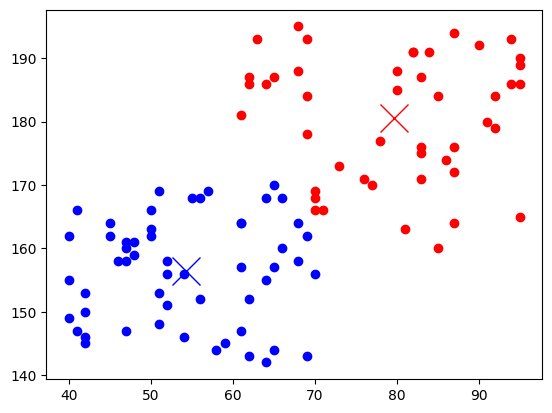

In [17]:
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2], 
         [d[1] for d in group2], 'o', color='b')

plt.plot(points[0][0], 
         points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], 
         points[1][1], 'x', color='b', markersize=20)

# 4. api(sklearn) 를 이용한 군집화

- sklearn 머신러닝
    * 예측함수
        : 분류, 회귀, 군집분석
        fit(학습), predict(예측)
    * 변환함수 
        : 전처리 ex. 스케일조정
        fit(학습),transform(변환함수)        

In [18]:
# 군집분석 라이브러리가 joblib충돌 경고 메세지 출력
import os
# 병렬처리를 하지 않겠다.
os.environ["OMP_NUM_THREADS"] = "1"

In [19]:
data = np.array(data)
# data
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,  # 2개 그룹으로 나눠
               init='random', # 초기 중심점 랜덤하게
               n_init=10,    # 10번 실행
               random_state=7
               )
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [20]:
# 중심점
model.cluster_centers_

array([[ 79.63043478, 180.52173913],
       [ 54.24074074, 156.5       ]])

In [21]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [22]:
group1 = data[model.labels_ == 1]
group2 = data[model.labels_ == 0]
c1, c2 = model.cluster_centers_
# group1, group2, c1,c2

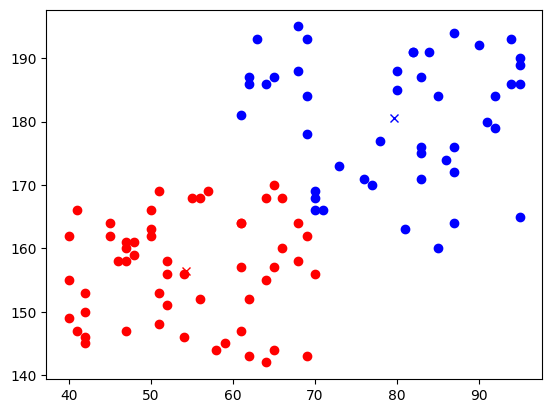

In [23]:
plt.plot([d[0] for d in group1], 
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2], 
         [d[1] for d in group2], 'o', color='b')

plt.plot(c1[0], c1[1], 'x', color='b') # group2의 중심점
plt.plot(c2[0], c2[1], 'x', color='r') # group1의 중심점